In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
load_dotenv()
import os

In [8]:
api_key = os.getenv('GOOGLE_API_KEY')

llm = ChatGoogleGenerativeAI(
    model = 'gemini-2.5-flash',
    temperature = 0.7,
    google_api_key = api_key
)

llm.invoke("hi").content


'Hi there! How can I help you today?'

In [7]:
class QAState(TypedDict):
    query: str
    response : str

In [10]:
def llm_call(state : QAState) -> QAState:
    query = state['query']

    prompt = f"Answer the following question in a polite way. question {query}"

    response = llm.invoke(prompt).content

    state['response'] = response

    return state

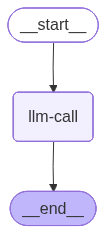

In [11]:
graph = StateGraph(QAState)

graph.add_node('llm-call', llm_call)

graph.add_edge(START, 'llm-call')
graph.add_edge('llm-call', END)

workflow = graph.compile()
workflow

In [14]:
init_state = {'query' : "what is the meaning of monday?"}
final_state = workflow.invoke(init_state)
print(final_state['response'])

Certainly! I'd be happy to explain the meaning of Monday for you.

The word "Monday" has a fascinating origin. It comes from the Old English word "Mōnandæg," which literally means **"Moon's day."** This reflects a common practice in many ancient cultures to name days of the week after celestial bodies. You'll find similar origins in other languages too; for example, the French "lundi" and Spanish "lunes" both derive from "luna," meaning moon.

In modern calendars, Monday is widely recognized as:

1.  **The second day of the week** (following Sunday and preceding Tuesday) in many parts of the world, particularly in countries that use the ISO 8601 standard.
2.  **The beginning of the work or school week** for many people globally, after the weekend. This is why it sometimes carries the cultural association of the "Monday blues" as people transition back to work or studies!

So, in essence, Monday is the "Moon's day" and the traditional start of the working week.

I hope this explanation 